<a href="https://colab.research.google.com/github/qu3nix/mfk/blob/main/%D0%93%D1%80%D0%B8%D0%B3%D0%BE%D1%80%D1%8C%D0%B5%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib as plt
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy import stats
# импортируем датасет
all_nydf = pd.read_csv(r'https://raw.githubusercontent.com/qu3nix/mfk/main/flights_NY.csv')



In [125]:
all_nydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       336776 non-null  int64  
 1   month      336776 non-null  int64  
 2   day        336776 non-null  int64  
 3   dep_time   328521 non-null  float64
 4   dep_delay  328521 non-null  float64
 5   arr_time   328063 non-null  float64
 6   arr_delay  327346 non-null  float64
 7   carrier    336776 non-null  object 
 8   tailnum    334264 non-null  object 
 9   flight     336776 non-null  int64  
 10  origin     336776 non-null  object 
 11  dest       336776 non-null  object 
 12  air_time   327346 non-null  float64
 13  distance   336776 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 36.0+ MB


In [126]:
all_nydf.isnull().sum()

year            0
month           0
day             0
dep_time     8255
dep_delay    8255
arr_time     8713
arr_delay    9430
carrier         0
tailnum      2512
flight          0
origin          0
dest            0
air_time     9430
distance        0
dtype: int64

Указано количество нулевых значений в каждом столбце; таким образом, информация отсутствует в столбцах dep_time, dep_delay, arr_time, arr_delay, tailnum и air_time. Учитывая частоту отсутствия значений в в столбцах dep_time и arr_time, можно предположить, что это отмененные рейсы. Касательно "максимально отсутствующих" air_time и arr_delay, можно предположить, что их значения ошибочно не вошли в данные (исключая отмененные рейсы).

In [6]:
nydf = all_nydf.dropna()
nydf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327346 entries, 0 to 336769
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       327346 non-null  int64  
 1   month      327346 non-null  int64  
 2   day        327346 non-null  int64  
 3   dep_time   327346 non-null  float64
 4   dep_delay  327346 non-null  float64
 5   arr_time   327346 non-null  float64
 6   arr_delay  327346 non-null  float64
 7   carrier    327346 non-null  object 
 8   tailnum    327346 non-null  object 
 9   flight     327346 non-null  int64  
 10  origin     327346 non-null  object 
 11  dest       327346 non-null  object 
 12  air_time   327346 non-null  float64
 13  distance   327346 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 37.5+ MB


dropna() попросту удаляет все строки, имеющие в любом столбце значение NA. В новом датасете nydf 327346 строки вместо 336776 из оригинального.

In [128]:
print('Среднее значение =', nydf['dep_delay'].mean())
print('Стандатрное отклонение =', nydf['dep_delay'].std())
print('Медиана =', nydf['dep_delay'].median())
print('Минимальное значиние =',nydf['dep_delay'].min())
print('Максимальное значение =',nydf['dep_delay'].max())

Среднее значение = 12.555155706805643
Стандатрное отклонение = 40.06568758558352
Медиана = -2.0
Минимальное значиние = -43.0
Максимальное значение = 1301.0



В выходе кода показана информация вышеуказанного метода, в котором mean - медиана, std - стандартное отклонение; min, max значения. Столбец dep_delay.

In [129]:
print('Среднее значение =', nydf['arr_delay'].mean())
print('Стандатрное отклонение =', nydf['arr_delay'].std())
print('Медиана =', nydf['arr_delay'].median())
print('Минимальное значиние =',nydf['arr_delay'].min())
print('Максимальное значение =',nydf['arr_delay'].max())

Среднее значение = 6.89537675731489
Стандатрное отклонение = 44.63329169019399
Медиана = -5.0
Минимальное значиние = -86.0
Максимальное значение = 1272.0


То же самое для столбца arr_delay


Группируем по столбцу 'carrier' и вычилсяем среднее по столбцу 'dep_delay':

In [67]:
group = nydf.groupby(['carrier'])['dep_delay'].mean()
group.sort_values()

carrier
US     3.744693
HA     4.900585
AS     5.830748
AA     8.569130
DL     9.223950
MQ    10.445381
UA    12.016908
OO    12.586207
VX    12.756646
B6    12.967548
9E    16.439574
WN    17.661657
FL    18.605984
YV    18.898897
EV    19.838929
F9    20.201175
Name: dep_delay, dtype: float64

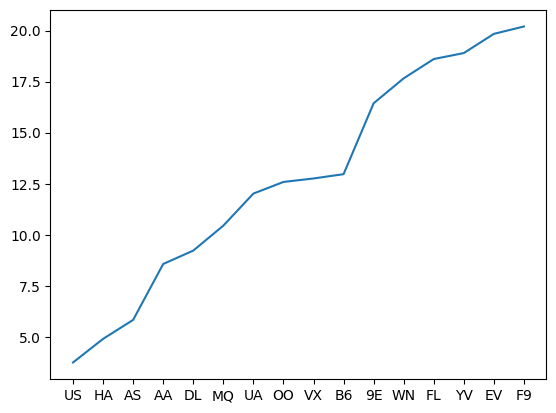

In [71]:
plt.plot(group.sort_values())

По методу quantile() вычисляем то же самое:

In [68]:

lower_bound = nydf['dep_delay'].quantile(q = 0.025)
upper_bound = nydf['dep_delay'].quantile(q = 0.975)
group95 = nydf[(nydf['dep_delay'] > lower_bound) & (nydf['dep_delay'] < upper_bound)].groupby(['carrier'])['dep_delay'].mean()
group95.sort_values()

carrier
HA     0.635179
US     2.419353
AS     4.600985
DL     5.258947
AA     5.512760
VX     6.900972
OO     7.095238
MQ     8.402592
UA     8.505072
B6     9.507438
9E    10.991283
WN    11.395681
FL    11.684672
F9    11.936275
YV    13.876623
EV    13.943504
Name: dep_delay, dtype: float64

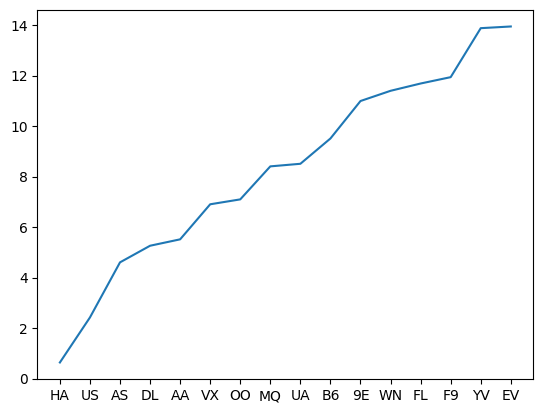

In [70]:
plt.plot(group95.sort_values())

In [10]:
# для облегчения дальнейшенго написания
AAdelay = nydf[nydf['carrier'] == 'AA']['dep_delay']
DLdelay = nydf[nydf['carrier'] == 'DL']['dep_delay']
print('Среднее American Airlines =',AAdelay.mean())
print('Среднее Delta Airlines =', DLdelay.mean())

Среднее American Airlines = 8.569130121764172
Среднее Delta Airlines = 9.223949809056192


Исходя из мысли о том, что у нас две большие независимые выборки, можно проверить гипотезу о равенстве двух средних на основе Z - статистики, то бишь нам известны дисперсии, и их выборочные средние имеют нормальное распределение. Переменная Z имеет нормальное распределение, благодаря чему находится значение p. 

In [15]:
# объединенная станд ошибка
pse = np.sqrt(((AAdelay.std() ** 2) / AAdelay.count()) + ((DLdelay.std() ** 2) / DLdelay.count()))
p = stats.norm.cdf(((AAdelay.mean() - DLdelay.mean()) / pse))
print ('Z - статистика = ', (AAdelay.mean() - DLdelay.mean()) / pse)
print ('Значение p = ', p)
print ('Уровень значимости = ', 1 - p)

Z - статистика =  -2.3644084232769744
Значение p =  0.00902944571770893
Уровень значимости =  0.9909705542822911


Таким образом, гипотеза о равенстве двух средних откидывается на уровне значимости alpha = 0.9909705542822911.

In [74]:
origins = nydf.groupby('origin')['dep_delay'].mean()
origins.sort_values()

origin
LGA    10.286583
JFK    12.023607
EWR    15.009110
Name: dep_delay, dtype: float64

Попытаемся использовать Z - статистику и тут:

In [80]:
def pse(a, b):
  return np.sqrt(((a.std() ** 2) / a.count()) + ((b.std() ** 2) / b.count()))
def p(a, b):
  return stats.norm.cdf(((a.mean() - b.mean()) / pse(a, b)))
LGA = nydf[nydf['origin'] == 'LGA']['dep_delay']
JFK = nydf[nydf['origin'] == 'JFK']['dep_delay']
EWR = nydf[nydf['origin'] == 'EWR']['dep_delay']
print(p(LGA, JFK), p(LGA, EWR), p(JFK, EWR))

2.7249934717419763e-24 9.402508860695532e-163 9.225544099518024e-71


Видим, что статистики абсолютно статистически значимы